# Tree Based Model



## Decision Tree

$\textbf{Classification}$:
- Entropy
$$E(p) = - \sum_{i=1}^c p_i log_2(p_i)$$
- Gini Impurity
$$I_{G}(p) = \sum_{i=1}^J p_i \sum_{k \neq i} p_k = \sum_{i=1}^J p_i (1 - p_i) = 1 - \sum_{i=1}^J p_i^2$$

$\textbf{Regression}$:
- Variance
$$V(S) = \frac{1}{|S|^2}\sum_{i \in S} \sum_{j \in S} (x_i - x_j)^2$$

$\textbf{How to split node}$:
1. Compute entropy/gini impurity of the target
2. Dataset is split on different attributes. The entropy/gini impurity of each branch is calculated
3. Compute information gain (difference of entropy)
4. Choose the split with the largest information gain as the decision node

$\textbf{How to split continuous features}$:
1. Sort values in ascent order: $a_1, a_2, ..., a_M$
2. Choose $M-1$ splitting points: $\frac{a_1 + a_2}{2}, \frac{a_2 + a_3}{2}, ..., \frac{a_{M-1} + a_M}{2}$
3. Find the splitting point just as categorial features

$\textbf{Different types of decision tree}$: https://en.wikipedia.org/wiki/Decision_tree_learning
- ID3: Information Gain (discrete features)
- C.4.5: Information Gain (continuous features)
- CART: Gini impurity
- CHAID:
  - Continuous response: F-test
  - Categorical response: $\chi^2$-test
- MARS
- Conditional Inference Tree


$\textbf{Regularization of Decision Tree}$: http://cs229.stanford.edu/notes/cs229-notes-dt.pdf
- Min Leaf Size: Do not split if its cardinality falls below a fixed threshold
- Max Depth: Do not split if more than a fixed threshold of splits were already taken to reach region
- Max Number of Nodes: Stop if a tree has more than a fixed threshold of leaf nodes

$\textbf{Advantages}$:
- easily interpret (white-box)
- not sensitive to outliers
- works well in qualitative (categorical) features

$\textbf{Disadvantages}$:
- overfitting
  - How to overcome overfitting
    - Regularization
    - Ensemble learning (bagging, boosting)
- can only output discrete values
- sensitive to direction of decision boundary
  - How to resolve direction problem
    - PCA

## Random Forest

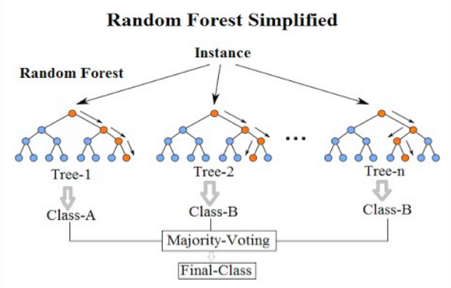

$\textbf{Steps}$:
1. Sample data (row) with replacement
2. Sample feature (column) without replacement
  - bagging tree does not sample feature
3. Build every decision tree independently
4. Final prediction: average or majority vote
5. $\underline{\textbf{Note}}$: No loss function, use out-of-bag errors

$\textbf{Hyperparameters}$:
- max_features: max # of features
- n_estimators: number of decision trees
- min_samples_leaf

$\textbf{Feature Importance}$: https://blog.datadive.net/selecting-good-features-part-iii-random-forests/
1. Each split will calculate decrease of variance/entropy
2. Sum up total decrease of variance/entropy by feature
3. Sort in descent order to obtain feature importance

$\textbf{Advantages}$:
- Reduce overfitting
  - if $V(X_i)=\sigma^2$, each $X_i$ is iid, then $V(\bar{X})=\frac{\sigma^2}{n}$
- Fast training and prediction
- Probabilistic classification

$\textbf{Disadvantages}$:
- Not easily interpretable (black-box)
- Large number of trees may make the algorithm slow for real-time prediction
- Biased in attributes with more levels, feature importance are not reliable
- If data contains correlated features, smaller groups are more favored over larger groups

## Boosting Tree

$\textbf{Loss function}$:
- regression: MSE $=\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2$
- classificatoin: exponential loss $=\frac{1}{n} \sum_{i=1}^n exp(- y_i \hat{y_i})$


### Adaptive Boosting (AdaBoost)

$\textbf{Steps}$:
1. Train a decision tree, produce an error $$r_i = \frac{\sum_{y_i \neq \hat{y_i}} w_i}{\sum w_i}$$
2. Compute predictor weight $$\alpha_j = \eta log(\frac{1 - r_i}{r_i})$$
3. Update instance weight, and then normalize the weight
    $$w_i=
    \begin{cases}
      w_i, & \text{if}\ y_i = \hat{y_i} \\
      w_i exp(\alpha_i), & \text{if}\ y_i \neq \hat{y_i}
    \end{cases}$$
4. AdaBoost predictions: compute predictions with all predictors with weights
    $$\hat{y}(x) = \underset{k}{\mathrm{argmax}} \sum_{j=1, \hat{y}_j (x)=k} \alpha_j$$

### Gradient Boosting

$\textbf{Loss function}$: 1st order Taylor approximation
$$\mathcal{L} = \sum_i L(y_i, \hat{y_i}^{m-1} + f_m(x_i)) \approx \sum_i [L(y_i, \hat{y_i}^{m-1}) + \frac{\partial L}{\partial f_m} f_m(x_i)]$$

$\textbf{Steps}$:
1. Initial prediction: average
2. Compute residual $y_m - \hat{y}_{m-1}$
3. Fit decision on residual
4. Next prediction: 
  - regression: $f_m (x) = f_{m-1} (x) + v * h_m (x; \theta)$
    - $v$ is learning rate
  - classification: $p_m (x) = \frac{\sum residuals}{\sum p_{m-1}(x) (1 - p_{m-1}(x))}$
5. When to stop: Use validation errors

$\textbf{Hyperparameters}$:
- n_estimators: number of decision trees
- max depth
- common max number of leaves: 8 to 32
- learning rate ($v$):
  - overfitting: increase $v$
  - underfitting: decrease $v$

### XGBoost

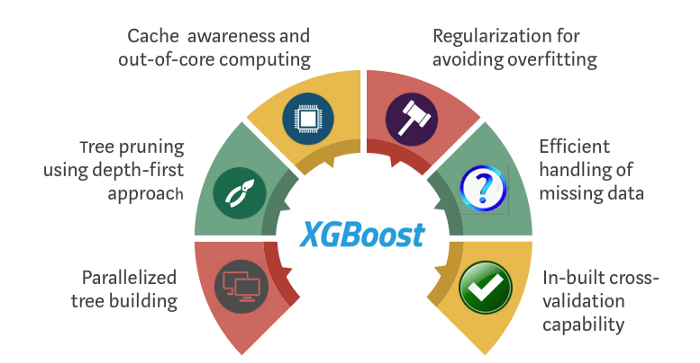

https://arxiv.org/pdf/1603.02754.pdf

$\textbf{Loss function}$: 2st order Taylor approximation + regularization
$$\mathcal{L} = \sum_i L(y_i, \hat{y_i}^{m-1} + f_m(x_i)) + \Omega(f_m) $$
$$\approx \sum_i [L(y_i, \hat{y_i}^{m-1}) + \frac{\partial L}{\partial f_m} f_m(x_i) + \frac{1}{2} \frac{\partial^2 L}{{f_m}^2} {f_m}^2 (x_i)] + \Omega(f_m)$$
$$\Omega(f_m) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2$$
- T: number of nodes
- $w_j$: output of each node

$\textbf{Advantages}$:
- System Optimization:
  - Parallel Programming (pre-sorted features)
  - Tree Pruning: don't need to reach max depth in every iteration
  - Hardware optimization
- Algorithmic Enhancement:
  - Regularization on weights and leaves
  - Sparisity Awareness: automatically 'learn' best missing value depending on training loss
  - Weighted Quantile Sketch: find optimal splits among weighted datasets
  - Cross-validation: built-in cross-validation at each iteration
  
$\textbf{Hyperparameters}$: https://xgboost.readthedocs.io/en/latest/parameter.html
- n_estimators
- min_child_weight
- max_depth
- gamma
- subsample
- colsample_bytree,
- reg_alpha: L1 regularizaiton
- reg_lambda: L2 regularization
- learning_rate